In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(rf"-page-phishing.csv")

In [5]:
df.head()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
0,37,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,126,4,1,2,0,1,3,0,2,0,0,0,0,0,0,0,0,0,1,1
3,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [6]:
df.columns

Index(['url_length', 'n_dots', 'n_hypens', 'n_underline', 'n_slash',
       'n_questionmark', 'n_equal', 'n_at', 'n_and', 'n_exclamation',
       'n_space', 'n_tilde', 'n_comma', 'n_plus', 'n_asterisk', 'n_hastag',
       'n_dollar', 'n_percent', 'n_redirection', 'phishing'],
      dtype='object')

**Removing redirection column for security reasons because going to use the model in deployment.**

In [7]:
df.drop('n_redirection', axis='columns', inplace=True)

In [8]:
df.shape

(100077, 19)

In [9]:
df.describe()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,phishing
count,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000
mean,39.177683,2.224397,0.405188,0.137724,1.135386,0.024391,0.215834,0.022143,0.143330,0.002608,0.004876,0.003617,0.002378,0.002468,0.004097,0.000450,0.001899,0.109286,0.363340
std,47.971847,1.255046,1.285465,0.723995,1.828526,0.167789,0.959802,0.268393,0.913656,0.082207,0.144569,0.078500,0.079558,0.104382,0.284046,0.058028,0.097412,1.695327,0.480964
min,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,44.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,4165.000000,24.000000,43.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,18.000000,5.000000,11.000000,19.000000,60.000000,13.000000,10.000000,174.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100077 entries, 0 to 100076
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   url_length      100077 non-null  int64
 1   n_dots          100077 non-null  int64
 2   n_hypens        100077 non-null  int64
 3   n_underline     100077 non-null  int64
 4   n_slash         100077 non-null  int64
 5   n_questionmark  100077 non-null  int64
 6   n_equal         100077 non-null  int64
 7   n_at            100077 non-null  int64
 8   n_and           100077 non-null  int64
 9   n_exclamation   100077 non-null  int64
 10  n_space         100077 non-null  int64
 11  n_tilde         100077 non-null  int64
 12  n_comma         100077 non-null  int64
 13  n_plus          100077 non-null  int64
 14  n_asterisk      100077 non-null  int64
 15  n_hastag        100077 non-null  int64
 16  n_dollar        100077 non-null  int64
 17  n_percent       100077 non-null  int64
 18  phis

In [11]:
df['phishing'].value_counts()

phishing
0    63715
1    36362
Name: count, dtype: int64

In [12]:
df1= df.copy()

In [13]:
df1.head()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,phishing
0,37,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,126,4,1,2,0,1,3,0,2,0,0,0,0,0,0,0,0,0,1
3,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,55,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


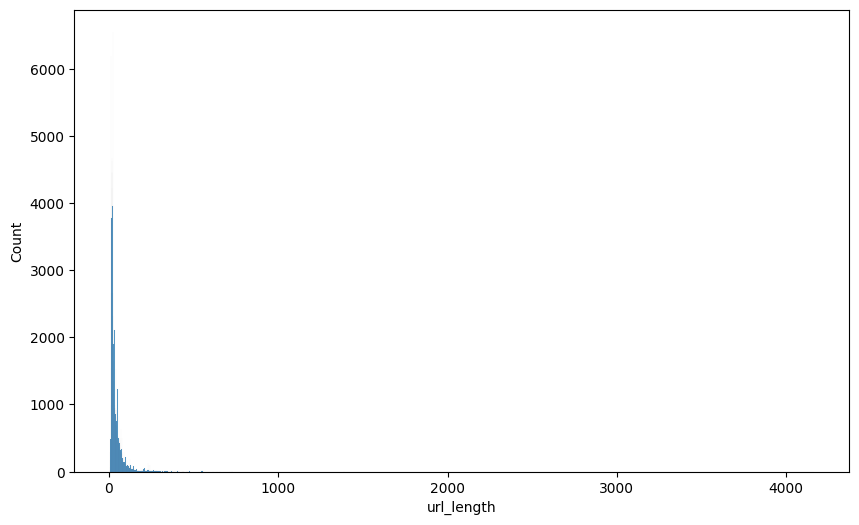

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df1, x="url_length")
plt.show()

<Axes: >

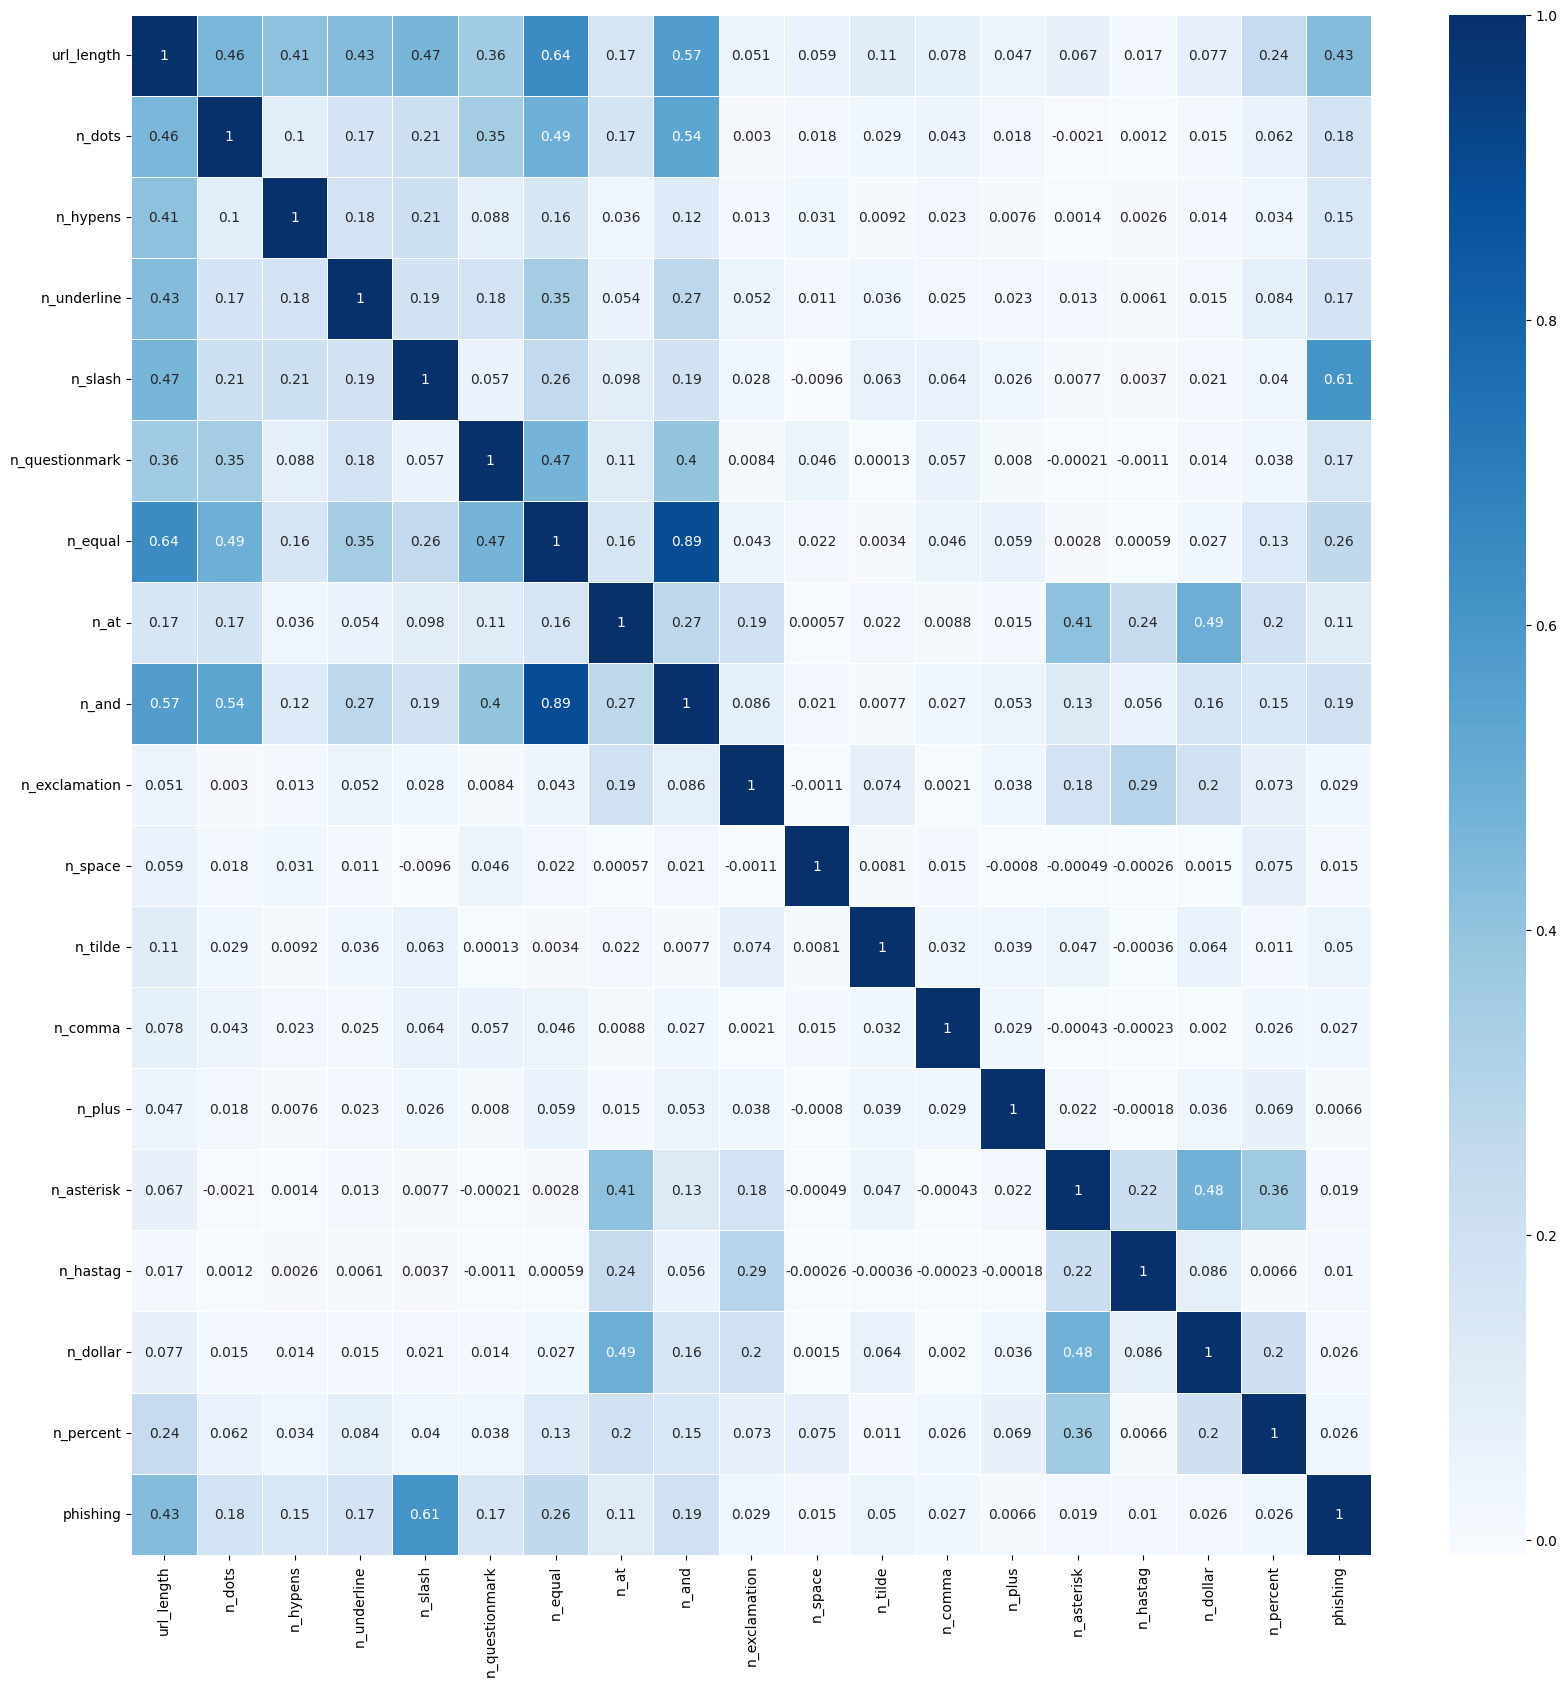

In [15]:
fig, ax=plt.subplots(figsize=(20,20))
sns.heatmap(df1.corr(),cmap='Blues',annot=True,linewidth=0.5,ax=ax)

In [16]:
x = df1.iloc[:,:-1]
y = df1.iloc[:, -1]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [18]:
X_train.shape, y_train.shape

((80061, 18), (80061,))

In [19]:
X_test.shape, y_test.shape

((20016, 18), (20016,))

In [20]:
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()

In [21]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
from sklearn.svm import SVC
SVC_model = SVC(probability=True)

In [23]:
SVC_model.fit(X_train_scaled,y_train)

SVC(probability=True)

In [24]:
y_pred = SVC_model.predict(X_test_scaled)

In [25]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [26]:
accuracy

0.8790967226219025